In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [22]:
img1 = cv2.imread("5.jpg")
img2 = cv2.imread("5.jpg")

orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

def match(d1, d2):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(d1, d2)
    matches = sorted(matches, key=lambda x: x.distance)
    mismatch_count = len(descriptors1) - len(matches)
    return matches

matches = match(descriptors1, descriptors2)

img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=2)


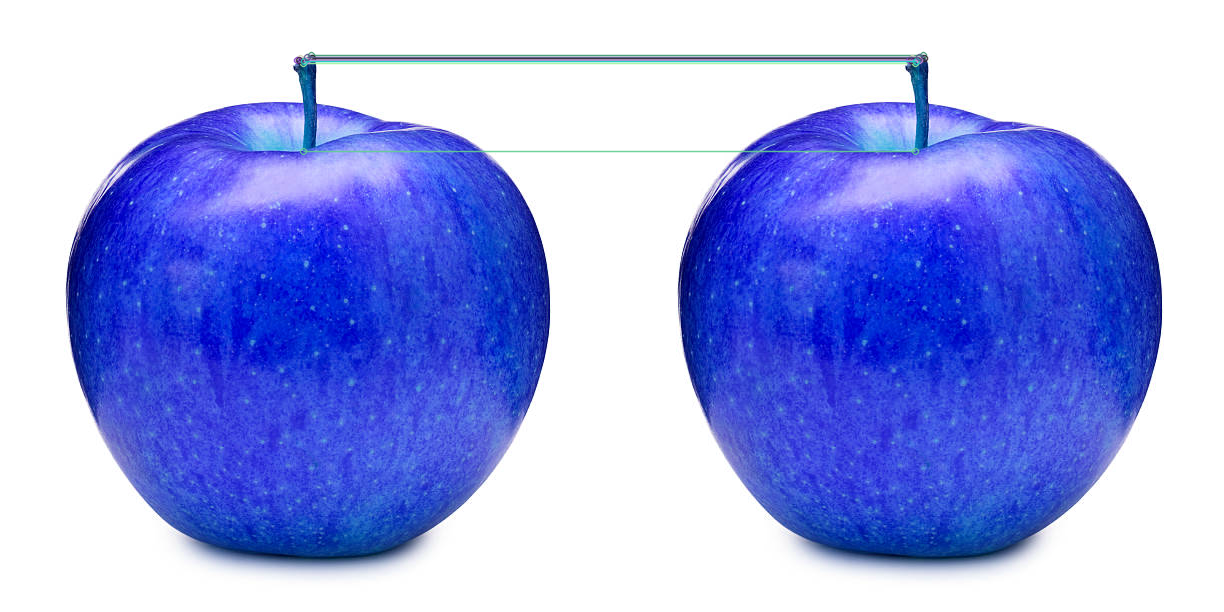

In [23]:
Image.fromarray(img_matches.astype(np.uint8))

In [4]:
x, y, w, h = 200, 200, 200, 200
img1_crop = img1[y:y+h, x:x+w]

keypoints1_crop, descriptors1_crop = orb.detectAndCompute(img1_crop, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

matches_crop = match(descriptors1_crop, descriptors2)
img_matches_crop = cv2.drawMatches(img1_crop, keypoints1_crop, img2, keypoints2, matches_crop[:10], None, flags=2)

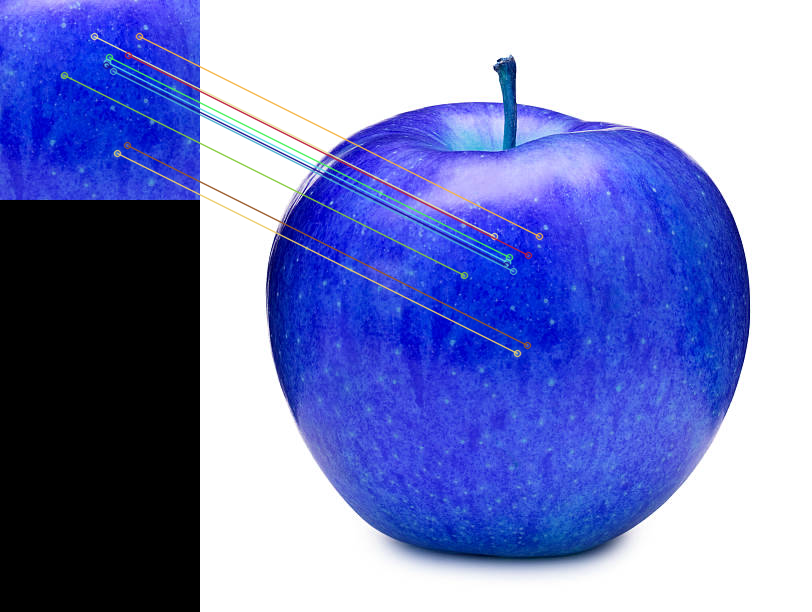

In [41]:
Image.fromarray(img_matches_crop.astype(np.uint8))

In [42]:
rows, cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
img1 = cv2.warpAffine(img1, M, (cols, rows))

keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

matches = match(descriptors1, descriptors2)
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=2)

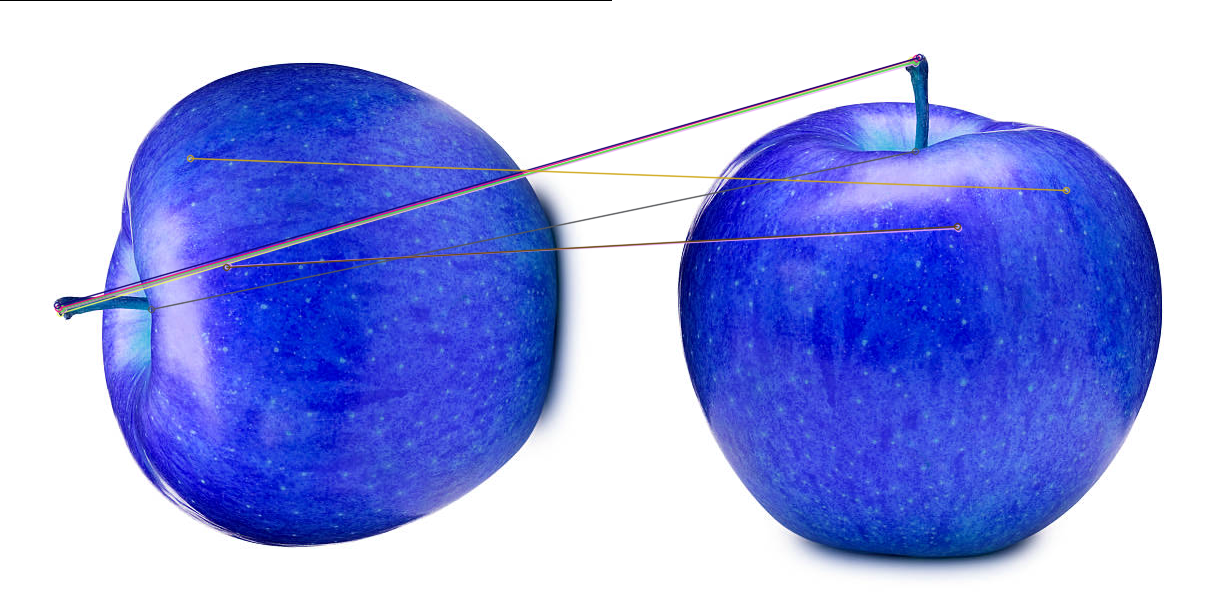

In [43]:
Image.fromarray(img_matches.astype(np.uint8))

In [ ]:
#---------------------------------------------------------------------------------------------------------------------

In [58]:
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

def match(descriptors1, descriptors2, threshold=0.7):
    matches = []
    for i, desc1 in enumerate(descriptors1):
        min_dist = math.inf
        min_idx = -1
        for j, desc2 in enumerate(descriptors2):
            dist = math.sqrt(sum([(a - b) ** 2 for a, b in zip(desc1, desc2)]))
            if dist < min_dist:
                min_dist = dist
                min_idx = j
        if min_dist < threshold:
            matches.append(cv2.DMatch(i, min_idx, min_dist))
    return matches

matches = match(descriptors1, descriptors2)

img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=2)

/var/folders/x2/vm_k_hnj145bq156d73glrk00000gn/T/ipykernel_76738/856498512.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  dist = math.sqrt(sum([(a - b) ** 2 for a, b in zip(desc1, desc2)]))


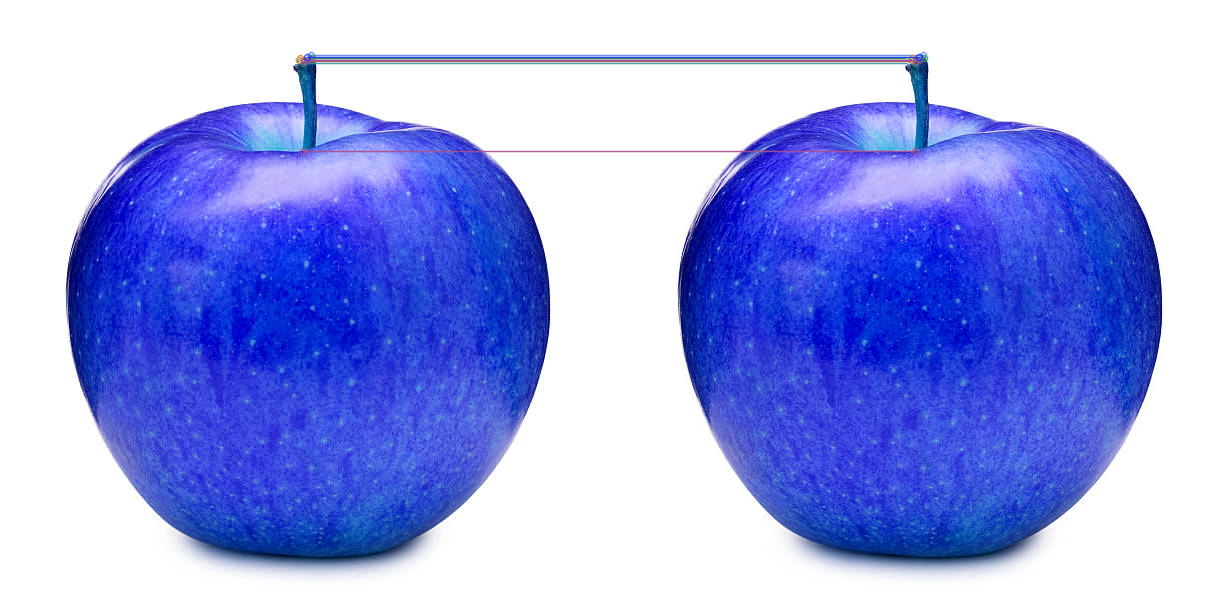

In [59]:
Image.fromarray(img_matches.astype(np.uint8))

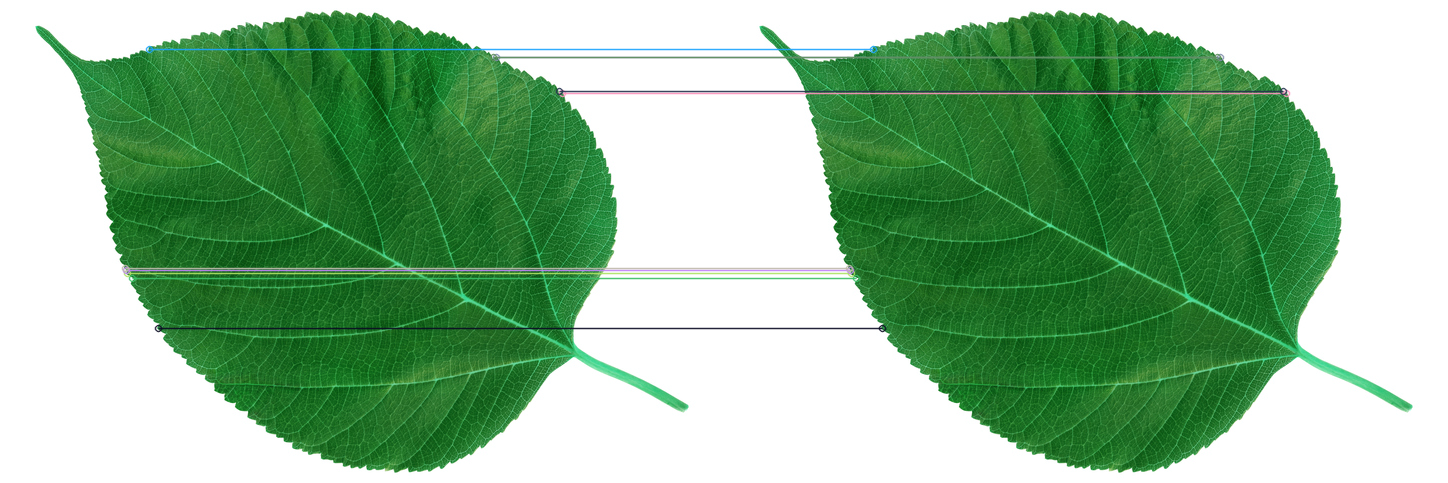

In [74]:
Image.fromarray(img_matches.astype(np.uint8))